In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import notebook
from sklearn.pipeline import Pipeline

In [2]:
data = pd.read_csv('/Users/greygreywolf/Downloads/autos.csv')

In [4]:
class GetNan:
    
    def fit(self, df, y = None):
        self.df = df
        self.size_df = self.df.shape[0]
        size_df_witout_nan = self.df.dropna().shape[0]
        self.num_str_with_nan = self.size_df - size_df_witout_nan
        return self
    
    def transform(self, df):
        print()
        print('='*10, 'ПОИСК СТРОК С ПРОПУСКАМИ (NAN)', '='*10)
        self.part =  round((self.num_str_with_nan / self.df.shape[0]) * 100, 2)
        print(f'\nКОЛИЧЕТСВО СТРОК С ПРОПУСКАМИ - {self.num_str_with_nan} СОСТОВЛЯЕТ {self.part}% ОТ {self.size_df}')
        if self.part <= 15:
            self.df = self.df.dropna()
            print('\nСТРОКИ С ПРОПУСКАМИ УДАЛЕНЫ')
        elif self.part > 15:
            print(f'\nКОЛИЧЕСТВО СТРОК С ПРОПУСКАМИ СЛИШКОМ ВЕЛИКО ДЛЯ УДАЛЕНИЯ')
            print('\nПРОПУСКИ СОДЕРЖАТ СЛЕДУЮЩИЕ КОЛОНКИ:')
            for column in self.df.columns:
                if self.df[column].isna().sum():
                    print(f'\nКОЛОНКА - {str(column).upper()}')
            
        elif self.part == 0:
            print(f'\nПРОПУСКИ НЕ ОБНАРУЖЕНЫ')
        print()
        print('='*10, 'FIN', '='*10)
        print()
        return self.df
            
        

In [5]:
class GetСorrelation:
    
    def fit(self, df, y = None):
        self.df = df
        return self
    
    def transform(self, df):
        plt.figure(figsize=(20, 8))
        plt.title('ТАБЛИЦА КОРРЕЛЯЦИИ ПРИЗНАКОВ.', fontsize=20)
        sns.heatmap(self.df.corr(), annot=True, cmap="coolwarm",linewidths=3)
        plt.grid(True);
        return self.df

In [6]:
class TextToLower:
    
    def fit(self, df, y = None):
        self.df = df
        self.lst_with_types = []
        for t in self.df.dtypes:
            self.lst_with_types.append(t)
        return self
    
    def transform(self, df):
        print('='*10, 'ПРЕОБРАЗОВАНИЕ ТЕКСТОВЫХ ДАННЫХ', '='*10)
        self.df.columns = self.df.columns.str.lower()
        print('\nНАЗВАНИЯ КОЛОНОК ПЕРЕВЕДЕНЫ В НИЖНИЙ РЕГИСТР')
        print()
        pd.DataFrame(columns=data.columns)
        if 'O' in self.lst_with_types:
            for column in self.df.columns:
                if self.df[column].dtype in ['object', 'str']:
                    self.df[column] = self.df[column].str.lower()
            print(f'\nСОДЕРЖИМОЕ КОЛОНОК ПЕРЕВЕДЕНО В НИЖНИЙ РЕГИСТР')
                    
        else:
            print('\nВ ДАТАФРЕЙМЕ НЕ ОБНАРУЖЕНЫ ТЕКСТОВЫЕ ДАННЫЕ')
        print()
        print('='*10, 'ПРЕОБРАЗОВАНИЕ ТЕКСТОВЫХ ДАННЫХ ЗАВЕРШЕНО', '='*10)
        return self.df
        

In [7]:
class FeaturesOfDigigtalSigns:
    
    def fit(self, df, y = None):
        self.df = df
        self.digit_columns = []
        for column in self.df.columns:
            if self.df[column].dtype in ['int64', 'float64']:
                self.digit_columns.append(column)
        self.num_of_digit_features = len(self.digit_columns)
        return self
    
    def transform(self, df):
        flag1 = None
        flag2 = None
        dct_with_report = {}
        self.position = 0
        for feature in notebook.tqdm(self.digit_columns, 'ПРОГРЕСС ПОСТРОЕНИЯ ГРАФИКОВ'):
            plt.figure(figsize=[20, 15])
            plt.subplots_adjust(top=0.94, wspace=0.3, hspace=0.95)
            self.position += 1
            plt.subplot(self.num_of_digit_features, 2, self.position)
            plt.title(f'BOXPLOT ДЛЯ {str(feature).upper()}', fontsize=10)
            sns.set_style('darkgrid')
            sns.boxplot(data=self.df[feature], orient='h')
            plt.axvline(np.mean(self.df[feature]), 
                        color='r', 
                        linestyle='-',
                        label='СРЕДНЕЕ')
            self.median = np.median(self.df[feature])
            self.mean = np.mean(self.df[feature])
            plt.legend(title=f'МЕДИАНА={self.median:.2f}, СРЕДНЕЕ={self.mean:.2f}', 
                       loc='center', 
                       edgecolor = 'r',
                       facecolor = 'oldlace',
                        bbox_to_anchor=(0.5, -0.55))
            self.position += 1            
            plt.subplot(self.num_of_digit_features, 2, self.position)
            sns.set_style('darkgrid')
            plt.title(f'ГИСТОГРАММА ДЛЯ {str(feature).upper()}', fontsize=10)
            sns.histplot(data=self.df[feature], color='b', kde=False)
            plt.axvline(np.mean(self.df[feature]), 
                        color='r', 
                        linestyle='-',
                        label='СРЕДНЕЕ')
            self.std = self.df[feature].std()
            plt.legend(title=f'СТАНДАРТНОЕ ОТКЛОНЕНИЕ = {self.std:.2f}, СРЕДНЕЕ = {self.mean:.2f}', 
                       loc='center', 
                       edgecolor = 'r',
                       facecolor = 'oldlace',
                       bbox_to_anchor=(0.5, -0.55));
            if self.mean > self.median:
                flag1 = f'Признак {feature} имеет положительную скошенность. В данных (справа) присутствуют дополнительные значения.'
            elif self.mean < self.median:
                flag1 = f'Признак {feature} имеет отрицательную скошенность скошенность. В данных (слева) присутствуют дополнительные значения.'
            elif self.mean == self.median:
                flag1 = f'Признак {feature} имеет распределение близкое к нормальному.'       
            dif = abs(self.mean - self.std)
            if (dif > ((self.mean) / 2)) | (dif < ((self.mean) / 2)):
                flag2 = 'В данных присутствует значительный разброс.'
            elif (dif == ((self.mean) / 2)) | (self.std == self.mean):
                flag2 = 'В данных нет разброса или он не значителен.'
            dct_with_report[feature] = [flag1, flag2]
            plt.show();
            print(f'\n{str(flag1).upper()}')
            print(f'\n{str(flag2).upper()}')
            print();
        return self.df

In [8]:
class FindDuplicates:

    def fit(self, df, y = None):
        self.num_duplicates = int(df.duplicated().sum())
        self.df_size_before = int(df.shape[0])
        self.fr = round((self.num_duplicates / self.df_size_before) * 100, 4)
        self.flag = self.fr < 12
        return self
        
    def transform(self, df):
        print('='*10,'ПОИСК ДУБЛИКАТОВ','='*10)
        if self.flag is True:
            print(f'\nНайдено {self.num_duplicates} дубликатов из {self.df_size_before} записей')
            self.df = (df.drop_duplicates().reset_index(drop=True))
            print('\nДубликаты удалены')
            self.df_size_after = self.df.shape[0]
            print(f'\nОсталось {self.df_size_after} записи')
        else:
            print(f'\nКОЛИЧЕСТВО ДУБЛИКАТОВ ({self.num_duplicates} ЗАПИСИ) ПРЕВЫШАЕТ ДОПУСТИМЫЕ ДЛЯ УДАЛЕНИЯ ЗНАЧЕНИЯ !!!')
        print()
        print('='*10,'ПОИСК ДУБЛИКАТОВ ЗАВЕРШЕН','='*10)
        return self.df

In [9]:
pipeline = Pipeline( steps = [
    ('text_to_lower', TextToLower()),
    ('draw_graphs', FeaturesOfDigigtalSigns()),
    ( 'find_duplicates', FindDuplicates()),
    ('draw_correlation', GetСorrelation()),
    ('get_nan', GetNan())
])

========== ПРЕОБРАЗОВАНИЕ ТЕКСТОВЫХ ДАННЫХ ==========

НАЗВАНИЯ КОЛОНОК ПЕРЕВЕДЕНЫ В НИЖНИЙ РЕГИСТР


СОДЕРЖИМОЕ КОЛОНОК ПЕРЕВЕДЕНО В НИЖНИЙ РЕГИСТР

========== ПРЕОБРАЗОВАНИЕ ТЕКСТОВЫХ ДАННЫХ ЗАВЕРШЕНО ==========


ПРОГРЕСС ПОСТРОЕНИЯ ГРАФИКОВ:   0%|          | 0/7 [00:00<?, ?it/s]

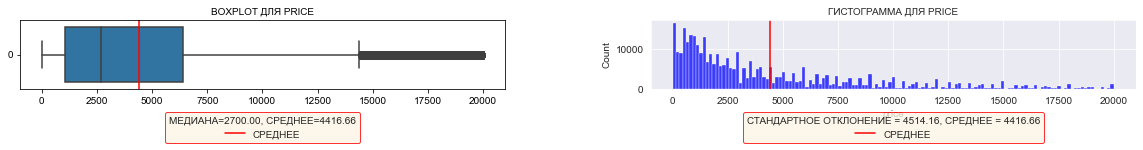


ПРИЗНАК PRICE ИМЕЕТ ПОЛОЖИТЕЛЬНУЮ СКОШЕННОСТЬ. В ДАННЫХ (СПРАВА) ПРИСУТСТВУЮТ ДОПОЛНИТЕЛЬНЫЕ ЗНАЧЕНИЯ.

В ДАННЫХ ПРИСУТСТВУЕТ ЗНАЧИТЕЛЬНЫЙ РАЗБРОС.



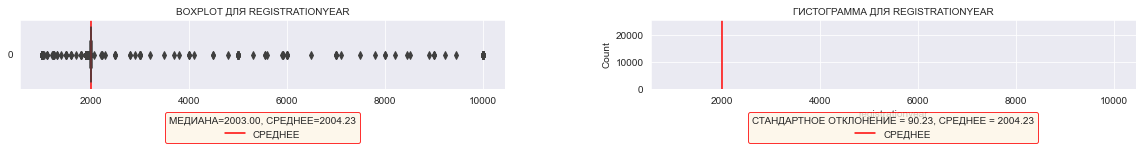


ПРИЗНАК REGISTRATIONYEAR ИМЕЕТ ПОЛОЖИТЕЛЬНУЮ СКОШЕННОСТЬ. В ДАННЫХ (СПРАВА) ПРИСУТСТВУЮТ ДОПОЛНИТЕЛЬНЫЕ ЗНАЧЕНИЯ.

В ДАННЫХ ПРИСУТСТВУЕТ ЗНАЧИТЕЛЬНЫЙ РАЗБРОС.



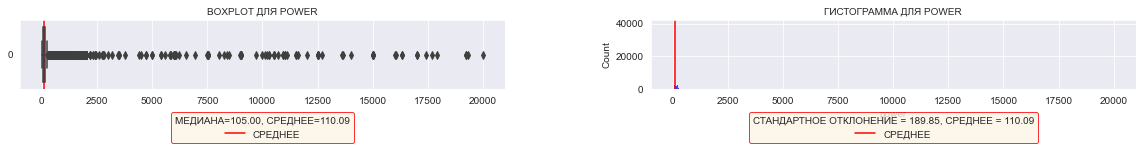


ПРИЗНАК POWER ИМЕЕТ ПОЛОЖИТЕЛЬНУЮ СКОШЕННОСТЬ. В ДАННЫХ (СПРАВА) ПРИСУТСТВУЮТ ДОПОЛНИТЕЛЬНЫЕ ЗНАЧЕНИЯ.

В ДАННЫХ ПРИСУТСТВУЕТ ЗНАЧИТЕЛЬНЫЙ РАЗБРОС.



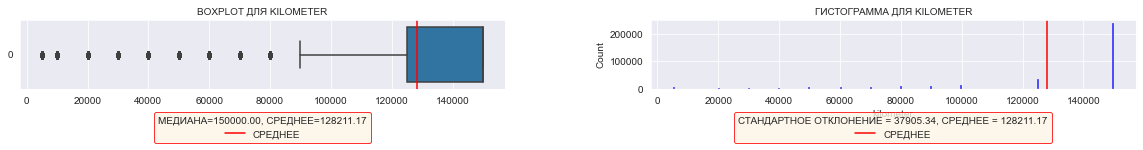


ПРИЗНАК KILOMETER ИМЕЕТ ОТРИЦАТЕЛЬНУЮ СКОШЕННОСТЬ СКОШЕННОСТЬ. В ДАННЫХ (СЛЕВА) ПРИСУТСТВУЮТ ДОПОЛНИТЕЛЬНЫЕ ЗНАЧЕНИЯ.

В ДАННЫХ ПРИСУТСТВУЕТ ЗНАЧИТЕЛЬНЫЙ РАЗБРОС.



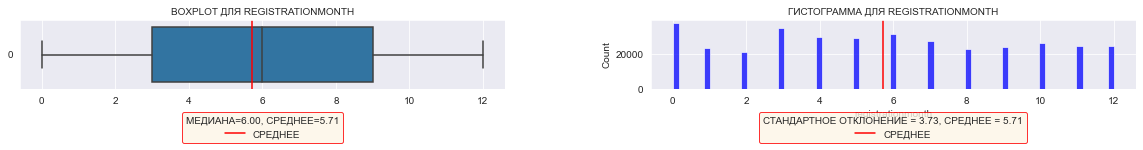


ПРИЗНАК REGISTRATIONMONTH ИМЕЕТ ОТРИЦАТЕЛЬНУЮ СКОШЕННОСТЬ СКОШЕННОСТЬ. В ДАННЫХ (СЛЕВА) ПРИСУТСТВУЮТ ДОПОЛНИТЕЛЬНЫЕ ЗНАЧЕНИЯ.

В ДАННЫХ ПРИСУТСТВУЕТ ЗНАЧИТЕЛЬНЫЙ РАЗБРОС.



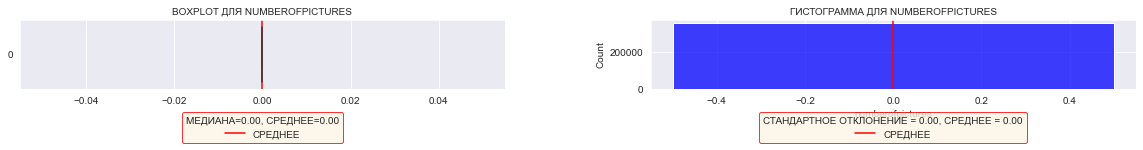


ПРИЗНАК NUMBEROFPICTURES ИМЕЕТ РАСПРЕДЕЛЕНИЕ БЛИЗКОЕ К НОРМАЛЬНОМУ.

В ДАННЫХ НЕТ РАЗБРОСА ИЛИ ОН НЕ ЗНАЧИТЕЛЕН.



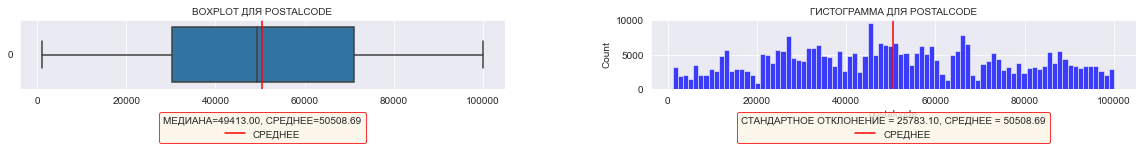


ПРИЗНАК POSTALCODE ИМЕЕТ ПОЛОЖИТЕЛЬНУЮ СКОШЕННОСТЬ. В ДАННЫХ (СПРАВА) ПРИСУТСТВУЮТ ДОПОЛНИТЕЛЬНЫЕ ЗНАЧЕНИЯ.

В ДАННЫХ ПРИСУТСТВУЕТ ЗНАЧИТЕЛЬНЫЙ РАЗБРОС.

========== ПОИСК ДУБЛИКАТОВ ==========

Найдено 4 дубликатов из 354369 записей

Дубликаты удалены

Осталось 354365 записи

========== ПОИСК ДУБЛИКАТОВ ЗАВЕРШЕН ==========

========== ПОИСК СТРОК С ПРОПУСКАМИ (NAN) ==========

КОЛИЧЕТСВО СТРОК С ПРОПУСКАМИ - 108555 СОСТОВЛЯЕТ 30.63% ОТ 354365

КОЛИЧЕСТВО СТРОК С ПРОПУСКАМИ СЛИШКОМ ВЕЛИКО ДЛЯ УДАЛЕНИЯ

ПРОПУСКИ СОДЕРЖАТ СЛЕДУЮЩИЕ КОЛОНКИ:

КОЛОНКА - VEHICLETYPE

КОЛОНКА - GEARBOX

КОЛОНКА - MODEL

КОЛОНКА - FUELTYPE

КОЛОНКА - NOTREPAIRED

========== FIN ==========



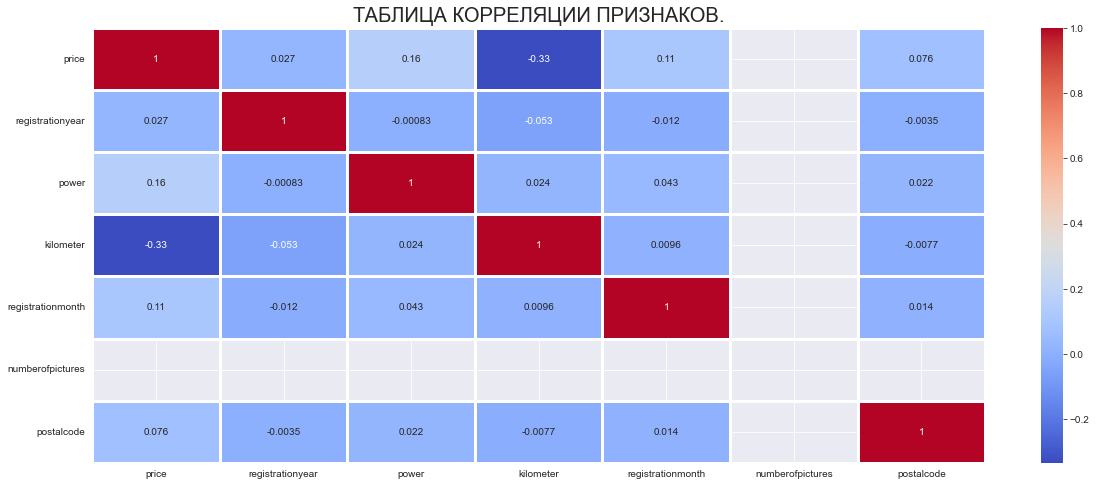

In [10]:
d = pipeline.fit_transform(data)